<a href="https://colab.research.google.com/github/MuhammadShavaiz/Clothes-Generator/blob/main/Image_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installing dependencies

In [1]:
!pip install tensorflow matplotlib tensorflow-datasets ipywidgets
import tensorflow as tf
# Check if GPU is available
device = tf.device("/gpu:0" if tf.config.list_physical_devices('GPU') else "/cpu")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.1 MB/s eta 0:00:00


In [2]:
# Importing datasets
import tensorflow_datasets as tfds

In [3]:
# Importing matplotlib for visulalizing
from matplotlib import pyplot as plt

In [4]:
# Bring in datasource
dataset = tfds.load('fashion_mnist', split = 'train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.YMBVBF_3.0.1/fashion_mnist-train.tfrecord*...:   …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.YMBVBF_3.0.1/fashion_mnist-test.tfrecord*...:   0…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


#VISUALIZE DATA AND BUILD DATASET

In [5]:
import numpy as np

In [6]:
# Getting data out of pipeline
dataiterator = dataset.as_numpy_iterator()

In [7]:
dataiterator.next()['image']

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 18],
        [ 77],
        [227],
        [227],
        [208],
        [210],
        [225],
        [216],
        [ 85],
        [ 32],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 61],
        [100],
        [ 97],
        [ 80],
        [ 57],
        [117],
        [227],
        [238],
        [115],
        [ 49],
        [ 78],
        [106],
        [108],
        [ 71],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 81],
        [105],
        [ 80],
        [ 69],
      

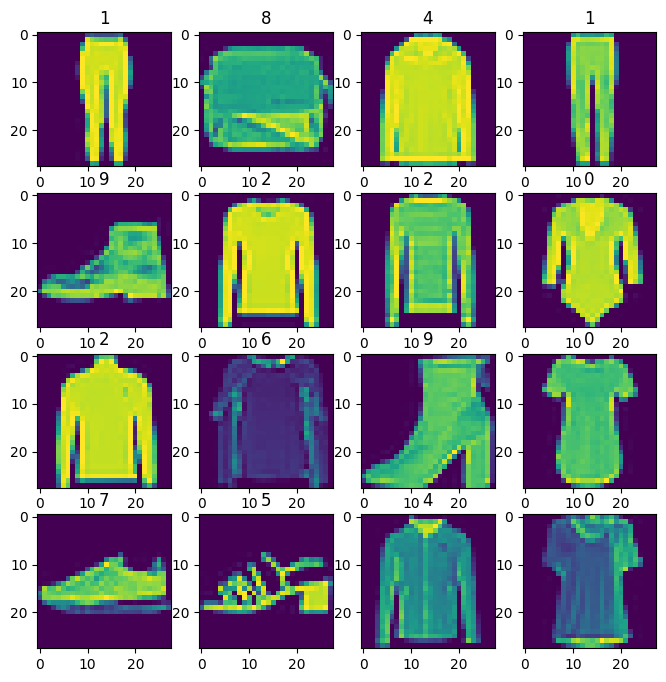

In [8]:
# Ploting the data with labels
fig, ax = plt.subplots(nrows = 4, ncols = 4, figsize = (8,8))
for row in range (4):
  for col in range (4):
    batch = dataiterator.next()
    ax[row, col].imshow(np.squeeze(batch['image']))
    ax[row, col].title.set_text(batch['label'])

In [9]:
# Scale images function
def scale_images(data):
  image = data['image']
  return image/255

In [10]:
# Applying transformations(mapping, caching, shuffling, batching, prefetching)
dataset = dataset.map(scale_images)
dataset = dataset.cache()
dataset = dataset.shuffle(60000)
dataset = dataset.batch(128)
dataset = dataset.prefetch(64)

#BUILD NEURAL NETWORK

In [11]:
# Import Modelling Components
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

In [12]:
# Build Generator
def build_generator():
    model = Sequential()

    model.add(Dense(7*7*128, input_dim = 128))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7,7,128)))

    model.add(UpSampling2D())
    model.add(Conv2D(128,5, padding ='same'))
    model.add(LeakyReLU(0.2))

    model.add(UpSampling2D())
    model.add(Conv2D(128,5, padding ='same'))
    model.add(LeakyReLU(0.2))

    model.add(Conv2D(128,4,padding = 'same'))
    model.add(LeakyReLU(0.2))

    model.add(Conv2D(128,4,padding = 'same'))
    model.add(LeakyReLU(0.2))

    model.add(Conv2D(1,4, padding = 'same', activation = 'sigmoid'))

    return model

In [13]:
generator = build_generator()

In [14]:
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              809088    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2  (None, 14, 14, 128)       0         
 D)                                                              
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                        

In [30]:
# generating new images
img = generator.predict(np.random.randn(4,128,1))

1/1 [==============================] - 0s 18ms/step


In [31]:
img.shape

(4, 28, 28, 1)

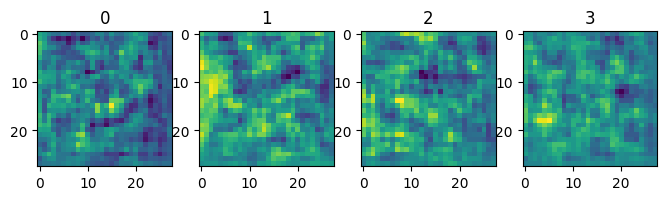

In [26]:
# plotting new images
fig, ax = plt.subplots(ncols = 4, figsize = (8,8))
for idx, img in enumerate(img):
    ax[idx].imshow(np.squeeze(img))
    ax[idx].title.set_text(idx)

In [18]:
def build_discriminator():
  model = Sequential()
  #1 conv block
  model.add(Conv2D(32, 5, input_shape = (28,28,1)))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))
  #2 conv block
  model.add(Conv2D(64 , 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))
  #3 conv block
  model.add(Conv2D(128, 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))
  #4 conv block
  model.add(Conv2D(256, 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  #flatten, passes to dense layer
  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1, activation = "sigmoid"))


  return model

In [28]:
discriminator = build_discriminator()

In [20]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 24, 24, 32)        0         
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 20, 20, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)      

In [21]:
img.shape

(28, 28, 1)

In [33]:
discriminator.predict(img)

1/1 [==============================] - 0s 16ms/step


array([[0.5008858 ],
       [0.50085294],
       [0.5008597 ],
       [0.50089145]], dtype=float32)

#CONSTRUCTING TRAINING LOOP


In [34]:
#setup losses and optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
gen_opt = Adam(learning_rate = 0.0001)
dis_opt = Adam(learning_rate = 0.00001)
gen_loss = BinaryCrossentropy()
dis_loss = BinaryCrossentropy()

In [35]:
#importing base model class to sub class
from tensorflow.keras.models import Model

In [36]:
tf.random.normal((6,128,1))

<tf.Tensor: shape=(6, 128, 1), dtype=float32, numpy=
array([[[-1.79297793e+00],
        [-1.37225345e-01],
        [-1.22637641e+00],
        [-3.93995821e-01],
        [ 8.61926377e-01],
        [ 7.18513429e-02],
        [ 1.30650640e-01],
        [-1.68117082e+00],
        [-1.43576944e+00],
        [ 9.77801383e-01],
        [ 1.18953311e+00],
        [-6.17497206e-01],
        [-2.77616858e+00],
        [ 8.38804096e-02],
        [ 8.14901650e-01],
        [-2.04082847e+00],
        [ 6.55522168e-01],
        [-4.77327824e-01],
        [-2.19561386e+00],
        [ 6.72070742e-01],
        [ 8.70984256e-01],
        [ 1.82193553e+00],
        [ 1.57277480e-01],
        [-9.04767156e-01],
        [ 2.76824772e-01],
        [-2.04183149e+00],
        [-5.93051016e-01],
        [ 9.24036026e-01],
        [ 2.56162584e-01],
        [-3.43472958e-01],
        [ 5.26835561e-01],
        [-7.43959188e-01],
        [ 1.10445189e+00],
        [-1.19241345e+00],
        [ 1.67923629e+00],
  

In [37]:
class FashionGAN(Model):
    def __init__(self, generator, discriminator, *args, **kwargs):
        # Pass through args and kwargs to base class
        super().__init__(*args, **kwargs)

        # Create attributes for gen and disc
        self.generator = generator
        self.discriminator = discriminator

    def compile(self, gen_opt, dis_opt, gen_loss, dis_loss, *args, **kwargs):
        # Compile with base class
        super().compile(*args, **kwargs)

        # Create attributes for losses and optimizers
        self.gen_opt = gen_opt
        self.dis_opt = dis_opt
        self.gen_loss = gen_loss
        self.dis_loss = dis_loss

    def train_step(self, batch):
        # Get the data
        real_images = batch
        fake_images = self.generator(tf.random.normal((128, 128, 1)), training=False)

        # Train the discriminator
        with tf.GradientTape() as d_tape:
            # Pass the real and fake images to the discriminator model
            yhat_real = self.discriminator(real_images, training=True)
            yhat_fake = self.discriminator(fake_images, training=True)
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)

            # Create labels for real and fakes images
            y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)

            # Add some noise to the TRUE outputs
            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real, noise_fake], axis=0)

            # Calculate loss - BINARYCROSS
            total_d_loss = self.dis_loss(y_realfake, yhat_realfake)

        # Apply backpropagation - nn learn
        dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
        self.dis_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))

        # Train the generator
        with tf.GradientTape() as g_tape:
            # Generate some new images
            gen_images = self.generator(tf.random.normal((128,128,1)), training=True)

            # Create the predicted labels
            predicted_labels = self.discriminator(gen_images, training=False)

            # Calculate loss - trick to training to fake out the discriminator
            total_g_loss = self.gen_loss(tf.zeros_like(predicted_labels), predicted_labels)

        # Apply backprop
        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.gen_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))

        return {"d_loss":total_d_loss, "g_loss":total_g_loss}

In [38]:
#instance of fashion gan class
fashgan = FashionGAN(generator, discriminator)

In [39]:
#model compile
fashgan.compile(gen_opt, dis_opt, gen_loss, dis_loss)

In [40]:
#build call back
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [41]:
class ModelMonitor(Callback):
  def __init__(self, num_img = 3, latent_dim = 128):
    self.num_img = num_img
    self.latent_dim = latent_dim

  def on_epoch_end(self, epoch, logs = None):
    random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim, 1))
    generated_images = self.model.generator(random_latent_vectors)
    generated_images *= 255
    generated_images.numpy()
    for i in range(self.num_img):
      img = array_to_img(generated_images[1])
      img.save(os.path.join('images', f'generated_img_{epoch}_{i}.png'))



In [42]:
dataset.as_numpy_iterator().next()

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [44]:
#TRAIN
#recommended 2000 epochs
hist = fashgan.fit(dataset, epochs = 50, callbacks = [ModelMonitor()])

Epoch 1/50
  6/469 [..............................] - ETA: 1:13 - d_loss: 0.2808 - g_loss: 2.5454

469/469 [==============================] - 77s 164ms/step - d_loss: 0.2762 - g_loss: 2.6646
Epoch 2/50
469/469 [==============================] - 76s 162ms/step - d_loss: 0.2729 - g_loss: 2.7109
Epoch 3/50
469/469 [==============================] - 76s 162ms/step - d_loss: 0.3406 - g_loss: 2.3974
Epoch 4/50
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6342 - g_loss: 0.7793
Epoch 5/50
469/469 [==============================] - 76s 162ms/step - d_loss: 0.3110 - g_loss: 2.3042
Epoch 6/50
469/469 [==============================] - 76s 162ms/step - d_loss: 0.2711 - g_loss: 2.6348
Epoch 7/50
469/469 [==============================] - 76s 162ms/step - d_loss: 0.2706 - g_loss: 2.6496
Epoch 8/50
469/469 [==============================] - 76s 162ms/step - d_loss: 0.2694 - g_loss: 2.6607
Epoch 9/50
469/469 [==============================] - 76s 162ms/step - d_loss: 0.2781 - g_loss: 2.6109
Epoch 10/50
469/469 [==============================] - 76s 162ms/step - d_loss: 0.28

In [47]:
imgs = generator.predict(tf.random.normal((16,128,1)))

1/1 [==============================] - 0s 19ms/step


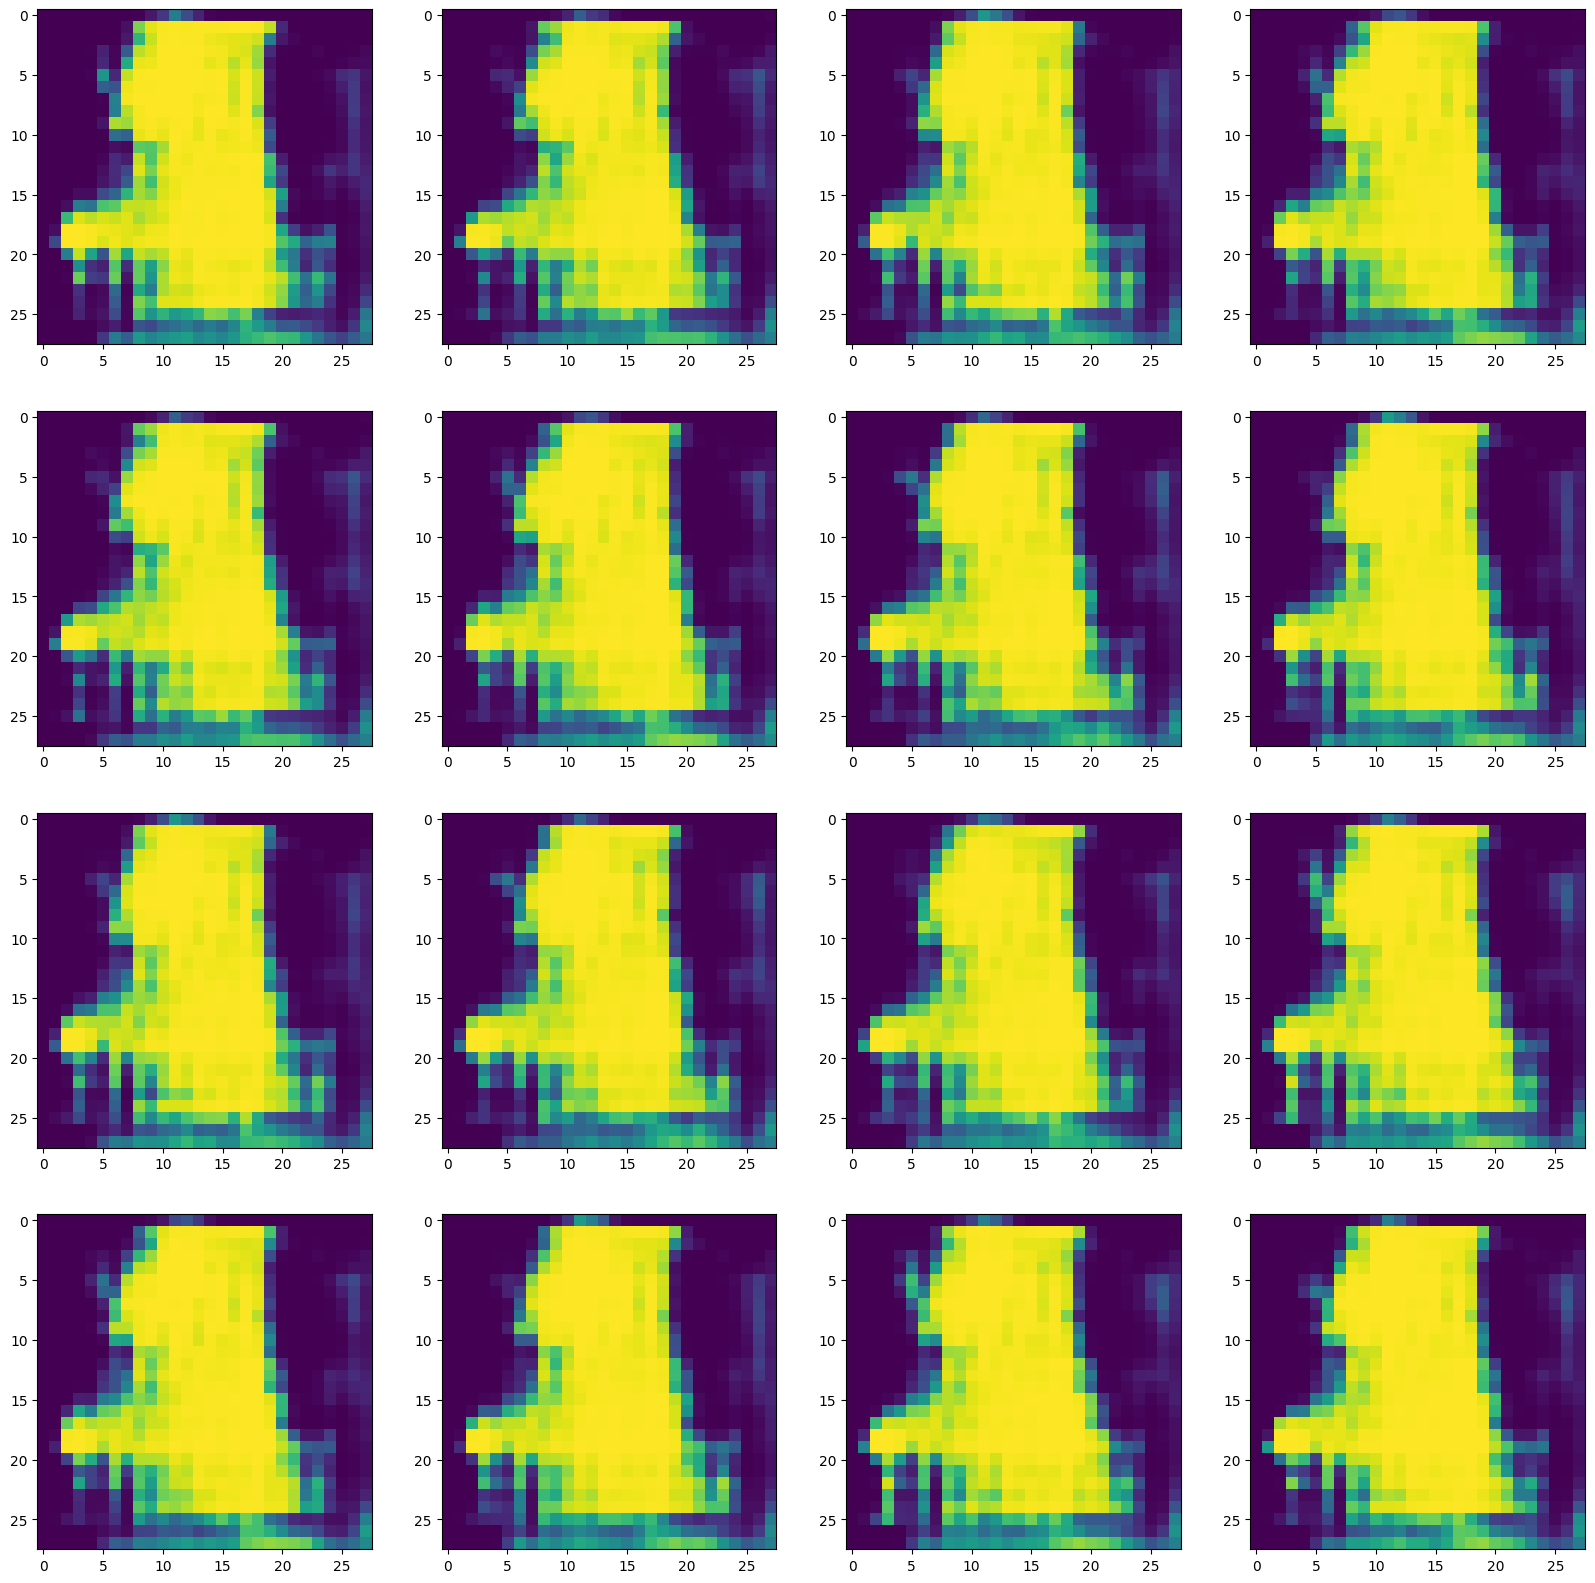

In [48]:
fig , ax = plt.subplots(ncols =4 , nrows = 4, figsize=(20,20))
for r in range(4):
  for c in range(4):
    ax[r][c].imshow(imgs[(r+1)*(c+1)-1])